# Importing Libraries

In [1]:
# Artifical Neural Network
# Data Preprocessing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# importing dataset
dataset=pd.read_csv('/content/drive/My Drive/churn_data/Churn_Modelling (2).csv')

In [3]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [6]:
## Create dummy variable
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)


In [7]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
## concatenate the data frame
X=pd.concat([X,geography,gender],axis=1)

In [10]:
## Drop unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [11]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [12]:
X.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Germany            0
Spain              0
Male               0
dtype: int64

In [13]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Germany', 'Spain', 'Male'],
      dtype='object')

In [14]:
## Spliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test=train_test_split (X,y,test_size=0.2,random_state=0)

In [16]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(8000, 11)
(8000,)
(2000, 11)
(2000,)


In [18]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

## importing the Keras Libraries and packeage

In [20]:
import keras 
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout

In [21]:
## Initialising the ANN
classifier=Sequential()

In [22]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu',input_dim=11))


In [25]:
## Adding the second hidden layer
classifier.add(Dense(units=6,kernel_initializer='he_uniform',activation='relu'))

In [26]:
# Adding the output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))


In [30]:
# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 1s 2ms/step - loss: 0.5758 - accuracy: 0.7160 - val_loss: 0.4810 - val_accuracy: 0.7959
Epoch 2/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4565 - accuracy: 0.7968 - val_loss: 0.4520 - val_accuracy: 0.7986
Epoch 3/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4350 - accuracy: 0.8052 - val_loss: 0.4391 - val_accuracy: 0.8039
Epoch 4/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4221 - accuracy: 0.8160 - val_loss: 0.4267 - val_accuracy: 0.8073
Epoch 5/100
536/536 [==============================] - 1s 1ms/step - loss: 0.4083 - accuracy: 0.8224 - val_loss: 0.4146 - val_accuracy: 0.8179
Epoch 6/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3975 - accuracy: 0.8294 - val_loss: 0.4074 - val_accuracy: 0.8217
Epoch 7/100
536/536 [==============================] - 1s 1ms/step - loss: 0.3897 - accuracy: 0.8334 - val_loss: 0.4041 - val_accuracy: 0.8236

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


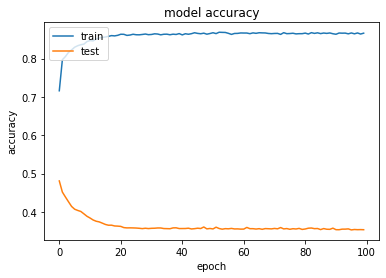

In [38]:
## List all data in history
print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

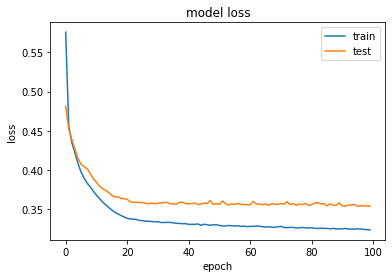

In [40]:
# summarize histroy for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper right')

In [41]:
## part 3 -Making the predictions and evaluating the model
# predicting the Test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

In [42]:
## Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)


In [45]:
# Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test,y_pred)

In [46]:
score

0.8655